In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Importing the dataset
df = pd.read_csv("hourlywagedata.csv")

In [2]:
import numpy as np
df = df.replace(' ', np.nan)

df=df.dropna() #drop rows with at least one NaN value
df

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234054538
1,0,1,2,16.4407309689108
2,0,1,3,21.3891077239505
3,1,1,1,11.377187468408
4,0,1,3,21.5607775454338
...,...,...,...,...
2995,0,3,4,20.4198852740072
2996,0,3,4,20.4414824085212
2997,1,3,4,18.4502340056492
2998,0,3,4,19.1444598024073


In [3]:
# Replace infinite updated data with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df.dropna()

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234054538
1,0,1,2,16.4407309689108
2,0,1,3,21.3891077239505
3,1,1,1,11.377187468408
4,0,1,3,21.5607775454338
...,...,...,...,...
2995,0,3,4,20.4198852740072
2996,0,3,4,20.4414824085212
2997,1,3,4,18.4502340056492
2998,0,3,4,19.1444598024073


In [4]:
df.isna().sum()

position    0
agerange    0
yrsscale    0
hourwage    0
dtype: int64

In [5]:
df['hourwage'].dtype

dtype('O')

In [6]:
df['hourwage'].apply(pd.to_numeric)

0       13.736234
1       16.440731
2       21.389108
3       11.377187
4       21.560778
          ...    
2995    20.419885
2996    20.441482
2997    18.450234
2998    19.144460
2999    13.638466
Name: hourwage, Length: 2911, dtype: float64

In [7]:
df['hourwage'] = df['hourwage'].astype(float)

In [8]:
df.dtypes

position      int64
agerange      int64
yrsscale      int64
hourwage    float64
dtype: object

In [9]:
x1 = df.iloc[:,0].values

In [10]:
y = df.iloc[:,3].values

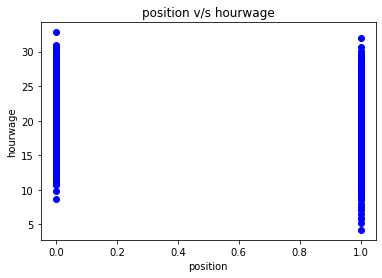

In [11]:
plt.scatter(x1,y,color = 'b')
plt.title('position v/s hourwage')
plt.xlabel('position')
plt.ylabel('hourwage')
plt.show()

In [12]:
x = df.iloc[:,1].values
x=x.reshape(-1, 1)

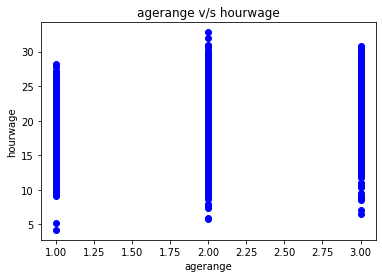

In [13]:
plt.scatter(x,y,color = 'b')
plt.title('agerange v/s hourwage')
plt.xlabel('agerange')
plt.ylabel('hourwage')
plt.show()

In [14]:
x = df.iloc[:,2].values


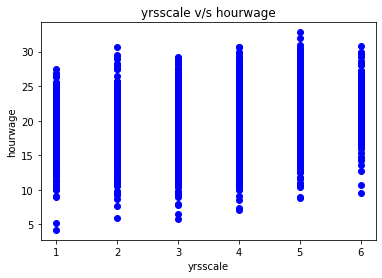

In [15]:
plt.scatter(x,y,color = 'b')
plt.title('yrsscale v/s hourwage')
plt.xlabel('yrsscale')
plt.ylabel('hourwage')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y_train, y_test = train_test_split(x1,y,test_size = 0.2, random_state=1)

In [18]:
from collections import Counter
# counting uniques values 
counter1 = Counter(x1_train)
counter2 = Counter(x1_test)
print(counter1)
print(counter2)
p1 = counter1[1] / len(x1_train)
print(p1)
p2 = counter2[1] / len(x1_test)
print(p2)

#use x from position variale only
#nurses noted with 1
#counter[1] fetches the position at index 1
#similar proportions

Counter({0: 1554, 1: 774})
Counter({0: 391, 1: 192})
0.3324742268041237
0.3293310463121784


In [337]:
x = df.iloc[:,0:3].values
y = df.iloc[:,3].values

In [338]:
y=y.reshape(-1,1)
y.shape

(2911, 1)

In [339]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=1)

In [340]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

In [341]:
predictions.shape

(583, 1)

In [342]:
y_test.shape

(583, 1)

<ErrorbarContainer object of 3 artists>

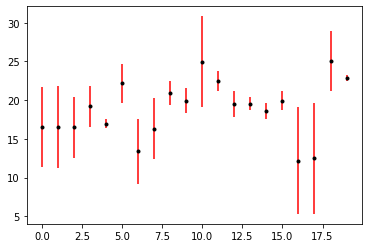

In [343]:
plt.errorbar(range(0,20),y_test[0:20].squeeze(),yerr=abs(y_test[0:20]-predictions[0:20]).squeeze(),fmt='.k',ecolor="red")
#into range input how many observatios are in test dataset
#range uses only 20 of errors and plots them
#abs gives absolute value
#squeeze converts into dimension python can work with

In [344]:
from sklearn.metrics import mean_squared_error
# compute the root-mean-square
rms = np.sqrt(mean_squared_error(y_test, predictions))

In [345]:
model.coef_ #one coefficient affecting predicted for each predictor variable 

array([[-2.08185742, -0.16741086,  0.75110973]])